In [72]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")

h = 0.1
n = 100
n = 1000  
n = 10000
n = 100000

n = 100000 h = 0.1 y(x) = x(x+1)
Time taken by Adams-Bashforth method: 281.72993659973145
Time taken by Adams-Moulton method: 412.9059314727783
Average percentage error of Adams-Bashforth method: 0.0006551756293642151
Average percentage error of Adams-Moulton method: 1.1803212742924815e-14


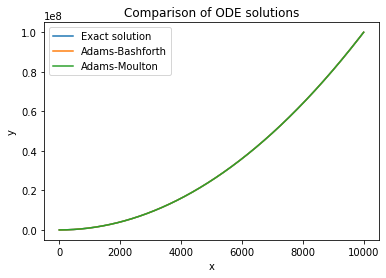

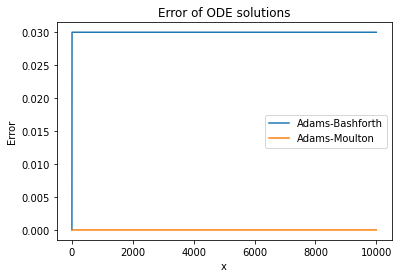

In [60]:
# First-order ODE
# Define the exact solution
def exact_solution(x):
    return x*(x+1)

# Define the derivative function
def deriv_func(x, y):
    return 2*x+1

# Define the Forward Euler method
import time
import numpy as np
import matplotlib.pyplot as plt

# Define the exact solution
def exact_solution(x):
    return x*(x+1)

# Define the derivative function
def deriv_func(x, y):
    return 2*x+1

# Define the Adams-Bashforth method
def adams_bashforth(deriv_func, x0, y0, h, n):
    x = np.linspace(x0, x0+h*n, n+1)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in range(1,4):
        y = y_list[-1] + h*deriv_func(x[i-1], y_list[-1])
        y_list.append(y)
    # Use the Adams-Bashforth method to compute the rest of the points
    for i in range(3, n):       #yn+3
        y = y_list[-1] + h*(23*deriv_func(x[i], y_list[-1]) - 16*deriv_func(x[i-1], y_list[-2]) + 5*deriv_func(x[i-2], y_list[-3]))/12
        y_list.append(y)
    return np.array(y_list)

# Define the Adams-Moulton method
def adams_moulton(deriv_func, x0, y0, h, n):
    x = np.linspace(x0, x0+h*n, n+1)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in range(1,4):
        y_next = y_list[-1] + h*deriv_func(x[i-1], y_list[-1])
        y = y_list[-1] + h*(deriv_func(x[i], y_next) + deriv_func(x[i-1], y_list[-1]))/2
        y_list.append(y)
    # Use the Adams-Moulton method to compute the rest of the points
    for i in range(3, n):   #yn+2 (+1 for next y using Euler)
        y_next = y_list[-1] + h*(5*deriv_func(x[i], y_list[-1]) + 8*deriv_func(x[i-1], y_list[-2]) - deriv_func(x[i-2], y_list[-3]))/12
        y = y_list[-1] + h*(deriv_func(x[i+1], y_next) + deriv_func(x[i], y_list[-1]))/2
        y_list.append(y)
    return np.array(y_list)

# Set the initial conditions and parameters
x0 = 0
y0 = 0

# Calculate the exact solution
x = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x)

# Calculate the Adams-Bashforth solution and time
t0 = time.time()
y_ab = adams_bashforth(deriv_func, x0, y0, h, n)
t_ab = (time.time()-t0)*1000

# Calculate the Adams-Moulton solution and time
t0 = time.time()
y_am = adams_moulton(deriv_func, x0, y0, h, n)
t_am = (time.time()-t0)*1000

# Calculate the tolerance values
tol_ab = np.abs(y_ab - y_exact)
tol_am = np.abs(y_am - y_exact)

plt.figure()
plt.plot(x, y_exact, label='Exact solution')
plt.plot(x, y_ab, label='Adams-Bashforth')
plt.plot(x, y_am, label='Adams-Moulton')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x, tol_ab, label='Adams-Bashforth')
plt.plot(x, tol_am, label='Adams-Moulton')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = x(x+1)')
print('Time taken by Adams-Bashforth method:', t_ab)
print('Time taken by Adams-Moulton method:', t_am)

APE_ab = np.mean(np.abs(tol_ab/y_exact)[1:])*100
APE_am = np.mean(np.abs(tol_am/y_exact)[1:])*100

# Print the results
print('Average percentage error of Adams-Bashforth method:', APE_ab)
print('Average percentage error of Adams-Moulton method:', APE_am)

n = 10000 h = 0.1 y(x) = 0.5*(3*sin(x) - x*cos(x))
Time taken by Adams-Bashforth method: 173.7380027770996
Time taken by Adams-Moulton method: 284.5180034637451
Average percentage error of Adams-Bashforth method: 13.183872932687448
Average percentage error of Adams-Moulton method: 3.7907060144841886


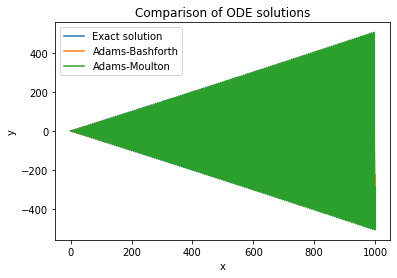

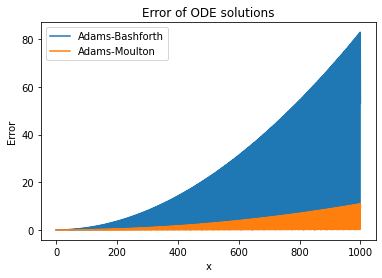

In [56]:
# Define the exact solution
def exact_solution(x):
    return 1/2 * (3 * np.sin(x) - x * np.cos(x))

# Define the derivative function
def deriv_func(x, y):
    return np.array([y[1], np.sin(x) - y[0]])

# Define the Adams-Bashforth method
def adams_bashforth(deriv_func, x0, y0, h, n):
    x = np.linspace(x0, x0+h*n, n+1)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in range(1,4):
        y = y_list[-1] + h*deriv_func(x[i-1], y_list[-1])
        y_list.append(y)
    # Use the Adams-Bashforth method to compute the rest of the points
    for i in range(3, n):
        y = y_list[-1] + h*(23*deriv_func(x[i], y_list[-1]) - 16*deriv_func(x[i-1], y_list[-2]) + 5*deriv_func(x[i-2], y_list[-3]))/12
        y_list.append(y)
    return np.array(y_list)[:,0]

# Define the Adams-Moulton method
def adams_moulton(deriv_func, x0, y0, h, n):
    x = np.linspace(x0, x0+h*n, n+1)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in range(1,4):
        y = y_list[-1] + h*deriv_func(x[i-1], y_list[-1])
        y_list.append(y)
    # Use the Adams-Moulton method to compute the rest of the points
    for i in range(3, n):
        y_pred = y_list[-1] + h*(23*deriv_func(x[i], y_list[-1]) - 16*deriv_func(x[i-1], y_list[-2]) + 5*deriv_func(x[i-2], y_list[-3]))/12
        # Corrector using Adams-Moulton method of order 3
        y = y_list[-1] + h*(5*deriv_func(x[i]+h, y_pred) + 8*deriv_func(x[i], y_list[-1]) - deriv_func(x[i-1], y_list[-2]))/12
        y_list.append(y)
    return np.array(y_list)[:,0]

# Set the initial conditions and parameters
x0 = 0
y0 = np.array([0, 1])

# Calculate the exact solution
x = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x)

# Calculate the Adams-Bashforth solution and time
t0 = time.time()
y_ab = adams_bashforth(deriv_func, x0, y0, h, n)
t_ab = (time.time()-t0)*1000

# Calculate the Adams-Moulton solution and time
t0 = time.time()
y_am = adams_moulton(deriv_func, x0, y0, h, n)
t_am = (time.time()-t0)*1000

# Calculate the tolerance values
tol_ab = np.abs(y_ab - y_exact)
tol_am = np.abs(y_am - y_exact)

# Plot the results
plt.figure()
plt.plot(x, y_exact, label='Exact solution')
plt.plot(x, y_ab, label='Adams-Bashforth')
plt.plot(x, y_am, label='Adams-Moulton')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x, tol_ab, label='Adams-Bashforth')
plt.plot(x, tol_am, label='Adams-Moulton')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = 0.5*(3*sin(x) - x*cos(x))')
print('Time taken by Adams-Bashforth method:', t_ab)
print('Time taken by Adams-Moulton method:', t_am)

APE_ab = np.mean(np.abs(tol_ab/y_exact)[1:])*100
APE_am = np.mean(np.abs(tol_am/y_exact)[1:])*100

# Print the results
print('Average percentage error of Adams-Bashforth method:', APE_ab)
print('Average percentage error of Adams-Moulton method:', APE_am)

n = 100000 h = 0.1 y(x) = 2*x + 2*exp(-x) + 2*cos(x) - 3
Time taken by Adams-Bashforth method: 1392.9777145385742
Time taken by Adams-Moulton method: 2752.9382705688477
Average percentage error of Adams-Bashforth method: 0.012557137569308097
Average percentage error of Adams-Moulton method: 0.004591015155419937


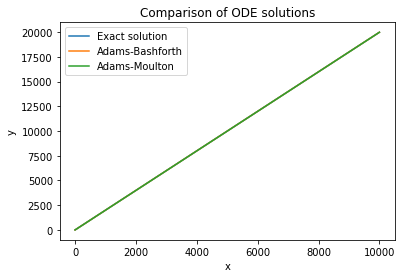

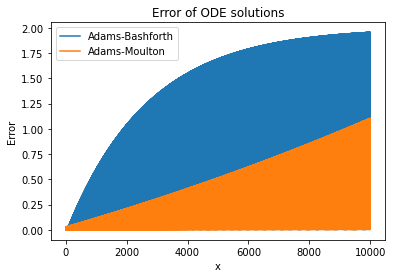

In [64]:
# Define the exact solution
def exact_solution(x):
    return 2*x + 2*np.exp(-x) + 2*np.cos(x) - 3


# Define the derivative function
def third_order_ODE(x, y):
    return np.array([y[1], y[2], 2*x - 1 - y[0] - y[1] - y[2]])

# Define the Adams-Bashforth method
def adams_bashforth(deriv_func, x0, y0, h, n):
    x = np.linspace(x0, x0+h*n, n+1)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in range(1,4):
        y = y_list[-1] + h*deriv_func(x[i-1], y_list[-1])
        y_list.append(y)
    # Use the Adams-Bashforth method to compute the rest of the points
    for i in range(3, n):
        y = y_list[-1] + h*(23*deriv_func(x[i], y_list[-1]) - 16*deriv_func(x[i-1], y_list[-2]) + 5*deriv_func(x[i-2], y_list[-3]))/12
        y_list.append(y)
    return np.array(y_list)[:,0]

# Define the Adams-Moulton method
def adams_moulton(deriv_func, x0, y0, h, n):
    x = np.linspace(x0, x0+h*n, n+1)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in range(1,4):
        y = y_list[-1] + h*deriv_func(x[i-1], y_list[-1])
        y_list.append(y)
    # Use the Adams-Moulton method to compute the rest of the points
    for i in range(3, n):
        y_pred = y_list[-1] + h*(23*deriv_func(x[i], y_list[-1]) - 16*deriv_func(x[i-1], y_list[-2]) + 5*deriv_func(x[i-2], y_list[-3]))/12
        # Corrector using Adams-Moulton method of order 3
        y = y_list[-1] + h*(5*deriv_func(x[i]+h, y_pred) + 8*deriv_func(x[i], y_list[-1]) - deriv_func(x[i-1], y_list[-2]))/12
        y_list.append(y)
    return np.array(y_list)[:,0]

# Set the initial conditions and parameters
x0 = 0
y0 = np.array([1, 0, 0])

# Calculate the exact solution
x = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x)

# Calculate the Adams-Bashforth solution and time
t0 = time.time()
y_ab = adams_bashforth(third_order_ODE, x0, y0, h, n)
t_ab = (time.time()-t0)*1000

# Calculate the Adams-Moulton solution and time
t0 = time.time()
y_am = adams_moulton(third_order_ODE, x0, y0, h, n)
t_am = (time.time()-t0)*1000

# Calculate the tolerance values
tol_ab = np.abs(y_ab - y_exact)
tol_am = np.abs(y_am - y_exact)

# Plot the results
plt.figure()
plt.plot(x, y_exact, label='Exact solution')
plt.plot(x, y_ab, label='Adams-Bashforth')
plt.plot(x, y_am, label='Adams-Moulton')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x, tol_ab, label='Adams-Bashforth')
plt.plot(x, tol_am, label='Adams-Moulton')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = 2*x + 2*exp(-x) + 2*cos(x) - 3')
print('Time taken by Adams-Bashforth method:', t_ab)
print('Time taken by Adams-Moulton method:', t_am)

APE_ab = np.mean(np.abs(tol_ab/y_exact)[1:])*100
APE_am = np.mean(np.abs(tol_am/y_exact)[1:])*100

# Print the results
print('Average percentage error of Adams-Bashforth method:', APE_ab)
print('Average percentage error of Adams-Moulton method:', APE_am)


n = 100000 h = 0.1 y(x) = ((x-1)*sin(sqrt(2)*x))/sqrt(2) + (x+1)*cos(sqrt(2)*x)
Time taken by Adams-Bashforth method: 1369.6136474609375
Time taken by Adams-Moulton method: 2745.3866004943848
Average percentage error of Adams-Bashforth method: 98.36646741248146
Average percentage error of Adams-Moulton method: 1626.8249210943472


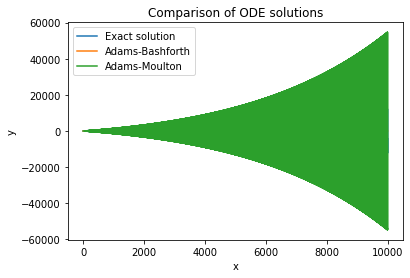

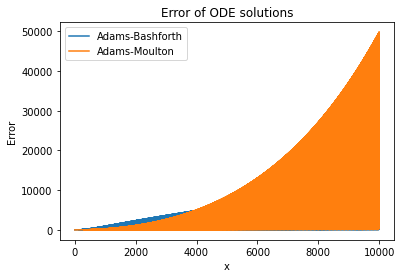

In [73]:
# Define the exact solution
def exact_solution(x):
    return ((x-1)*np.sin(np.sqrt(2)*x))/np.sqrt(2) + (x+1)*np.cos(np.sqrt(2)*x)


# Define the derivative function
def deriv_func(x, y):
    return np.array([y[1], y[2], y[3], -4*y[2] - 4*y[0]])

# Define the Adams-Bashforth method
def adams_bashforth(deriv_func, x0, y0, h, n):
    x = np.linspace(x0, x0+h*n, n+1)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in range(1,4):
        y = y_list[-1] + h*deriv_func(x[i-1], y_list[-1])
        y_list.append(y)
    # Use the Adams-Bashforth method to compute the rest of the points
    for i in range(3, n):
        y = y_list[-1] + h*(23*deriv_func(x[i], y_list[-1]) - 16*deriv_func(x[i-1], y_list[-2]) + 5*deriv_func(x[i-2], y_list[-3]))/12
        y_list.append(y)
    return np.array(y_list)[:,0]

# Define the Adams-Moulton method
def adams_moulton(deriv_func, x0, y0, h, n):
    x = np.linspace(x0, x0+h*n, n+1)
    y_list = [y0]
    # Use the Forward Euler method to compute initial points
    for i in range(1,4):
        y = y_list[-1] + h*deriv_func(x[i-1], y_list[-1])
        y_list.append(y)
    # Use the Adams-Moulton method to compute the rest of the points
    for i in range(3, n):
        y_pred = y_list[-1] + h*(23*deriv_func(x[i], y_list[-1]) - 16*deriv_func(x[i-1], y_list[-2]) + 5*deriv_func(x[i-2], y_list[-3]))/12
        # Corrector using Adams-Moulton method of order 3
        y = y_list[-1] + h*(5*deriv_func(x[i]+h, y_pred) + 8*deriv_func(x[i], y_list[-1]) - deriv_func(x[i-1], y_list[-2]))/12
        y_list.append(y)
    return np.array(y_list)[:,0]

# Set the initial conditions and parameters
x0 = 0
y0 = np.array([1, 0, 0, -4])

# Calculate the exact solution
x = np.linspace(x0, x0+h*n, n+1)
y_exact = exact_solution(x)

# Calculate the Adams-Bashforth solution and time
t0 = time.time()
y_ab = adams_bashforth(deriv_func, x0, y0, h, n)
t_ab = (time.time()-t0)*1000

# Calculate the Adams-Moulton solution and time
t0 = time.time()
y_am = adams_moulton(deriv_func, x0, y0, h, n)
t_am = (time.time()-t0)*1000

# Calculate the tolerance values
tol_ab = np.abs(y_ab - y_exact)
tol_am = np.abs(y_am - y_exact)

# Plot the results
plt.figure()
plt.plot(x, y_exact, label='Exact solution')
plt.plot(x, y_ab, label='Adams-Bashforth')
plt.plot(x, y_am, label='Adams-Moulton')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE solutions')
plt.legend()

plt.figure()
plt.plot(x, tol_ab, label='Adams-Bashforth')
plt.plot(x, tol_am, label='Adams-Moulton')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error of ODE solutions')
plt.legend()

print('n =',n,'h =',h,'y(x) = ((x-1)*sin(sqrt(2)*x))/sqrt(2) + (x+1)*cos(sqrt(2)*x)')
print('Time taken by Adams-Bashforth method:', t_ab)
print('Time taken by Adams-Moulton method:', t_am)

APE_ab = np.mean(np.abs(tol_ab/y_exact)[1:])*100
APE_am = np.mean(np.abs(tol_am/y_exact)[1:])*100

# Print the results
print('Average percentage error of Adams-Bashforth method:', APE_ab)
print('Average percentage error of Adams-Moulton method:', APE_am)